# ROC 曲线
- TPR: True Positive Rate, = recall
- FPR: False Positive Rate, FP / (TN + FP)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

y[digits.target == 9] = 1
y[digits.target != 9] = 0

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [4]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
decision_scores = log_reg.decision_function(X_test)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [5]:
from playML.metrics import FPR, TPR

fprs = []
tprs = []
thresholds = np.arange(np.min(decision_scores), np.max(decision_scores), 0.1)
for threshold in thresholds:
    y_predict = np.array(decision_scores >= threshold, dtype='int')
    fprs.append(FPR(y_test, y_predict))
    tprs.append(TPR(y_test, y_predict))

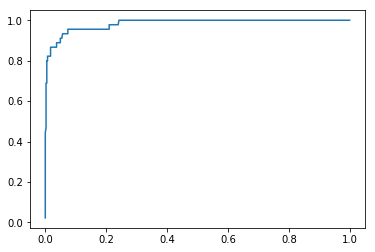

In [6]:
plt.plot(fprs, tprs)

## scikit-learn 中的 ROC

In [7]:
from sklearn.metrics import roc_curve

fprs, tprs, thresholds = roc_curve(y_test, decision_scores)

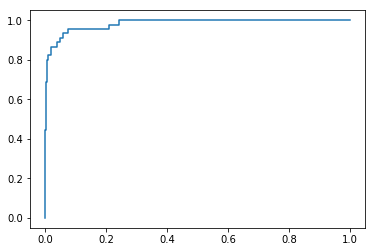

In [8]:
plt.plot(fprs, tprs)

## ROC AUC
主要应用在比较两个模型孰优孰劣

In [9]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, decision_scores)

0.9830452674897119

# ROC 和 PR

**核心区别在 TN**
- PR 不反应 TN, 所以如果在应用场景中 TN 不重要, 那么 PR 是一个很好的指标(事实上, Precision 和 Recall 就是通过抹去 TN, 来去除极度的偏斜数据带来的影响, 进而放大 FP, FN 和 TP 三者的关系的)
- ROC 综合了 TN, FP, FN 和 TP, 在 TN 没有那么多(数据没有那么偏斜), 或者 TN 是一种很重要的需要考虑的情况下, ROC 能反映出 PR 不能反映的问题